<img src="apples.jpeg" style="width: 400px; height: 200px; float: right; margin: 10px; border: 2px solid #000; box-sizing: border-box;">

# Quality grading of apples
***
The dataset contains characteristics such as size, weight, sweetness, crispness, juiciness, ripeness, acidity, and quality.</br>
Based on the input numerical data, the model estimates what the quality of the apple will be (good/bad) in the end.  
  
Data source: [kaggle.com](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apples = pd.read_csv('datasets/apple_quality.csv')

In [3]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
apples.shape

(4001, 9)

In [5]:
# The acidity column initially is of "object" type, which later causes issues with ML algorithms, so I handled this in time.
apples['Acidity'] = pd.to_numeric(apples['Acidity'], errors='coerce')
apples.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [6]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [7]:
apples.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [ ]:
# Although the "A_id" column is incorrectly of type float64, I simply didn't include it in the chart drawing; I didn't modify it like the "Acidity" column.
g = sns.pairplot(apples.drop(columns='A_id'), hue='Quality')

In [ ]:
# The lower one seemed to be the most separable among the plots
sns.scatterplot(x='Size', y='Sweetness', hue='Quality', data=apples)

In [ ]:
apples_clean = apples.drop('A_id', axis=1)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(data=apples_clean, inner="quartile", palette="muted", linewidth=1.5)
plt.title("Violin Plot of Fruit Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
# The ML algorithm counted the last row as empty, so I deleted it to avoid errors.
apples = apples.dropna()

In [ ]:
apples

In [ ]:
apple_feature = apples.drop('Quality', axis=1)
apple_target = apples['Quality']

In [ ]:
apple_feature_train, apple_feature_test, apple_target_train, apple_target_test = train_test_split(
    apple_feature, apple_target, test_size=0.2, random_state=11111)

In [ ]:
apple_feature_train

In [ ]:
# Verification to check for any NaN values.
apple_feature_train.isna().sum()

In [93]:
# Strings cannot be handled as target objects, so they need to be encoded into a numpy array.
label_encoder = LabelEncoder()
apple_target_train_encoded = label_encoder.fit_transform(apple_target_train)

In [ ]:
# This is what the resulting numpy array looks likeapple_target_train_encoded
apple_target_train_encoded.head()

In [95]:
# Applying the Support Vector Machines method seems like a good idea here, so we create an instance of the object
svc = SVC()

# Training the SVM classifier
svc.fit(apple_feature_train, apple_target_train_encoded)

# Predictions from the test dataset
apple_target_predicted = svc.predict(apple_feature_test)

# Decoding the predictions to get back the original strings
apple_target_predicted_decoded = label_encoder.inverse_transform(apple_target_predicted)

# Calculating accuracy
accuracy = accuracy_score(apple_target_test, apple_target_predicted_decoded)
print("Accuracy:", accuracy)

Accuracy: 0.4675


***
<em>So, without any calculations, we have a fifty-fifty chance of guessing whether the apple is good or not.
It's worth looking into other methods as well.</em>
***

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import time

# Scaling the features with StandardScaler
scaler = StandardScaler()
scaled_apple_feature = scaler.fit_transform(apple_feature)

methods = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('C-Support Vector Classification', SVC()),
]

method_names = []
method_accuracy = []
method_precision = []
method_recall = []
method_execution_time = []

for name, model in methods:
    start_time = time.time()
    
    kfold = StratifiedKFold(n_splits=10, random_state=11111, shuffle=True)
    cv_results = cross_val_score(model, apple_feature, apple_target, cv=kfold, scoring='accuracy')
    accuracy = 100*cv_results.mean()

    end_time = time.time()
    execution_time = end_time - start_time

    model.fit(apple_feature, apple_target)
    predictions = model.predict(apple_feature)

    # Calculating precision and recall
    report = classification_report(apple_target, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

    print(f'{name}:')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Execution Time: {execution_time:.3f} s\n')
    
    method_names.append(name)
    method_accuracy.append(accuracy)
    method_precision.append(precision)
    method_recall.append(recall)
    method_execution_time.append(execution_time)

Logistic Regression:
Accuracy: 74.77%
Precision: 0.75
Recall: 0.75
Execution Time: 0.282 s

Linear Discriminant Analysis:
Accuracy: 74.70%
Precision: 0.75
Recall: 0.75
Execution Time: 0.218 s

K-Neighbors Classifier:
Accuracy: 56.38%
Precision: 0.74
Recall: 0.74
Execution Time: 0.445 s

Decision Tree Classifier:
Accuracy: 81.03%
Precision: 1.00
Recall: 1.00
Execution Time: 0.757 s

Gaussian Naive Bayes:
Accuracy: 75.10%
Precision: 0.75
Recall: 0.75
Execution Time: 0.111 s

C-Support Vector Classification:
Accuracy: 48.22%
Precision: 0.51
Recall: 0.51
Execution Time: 9.552 s



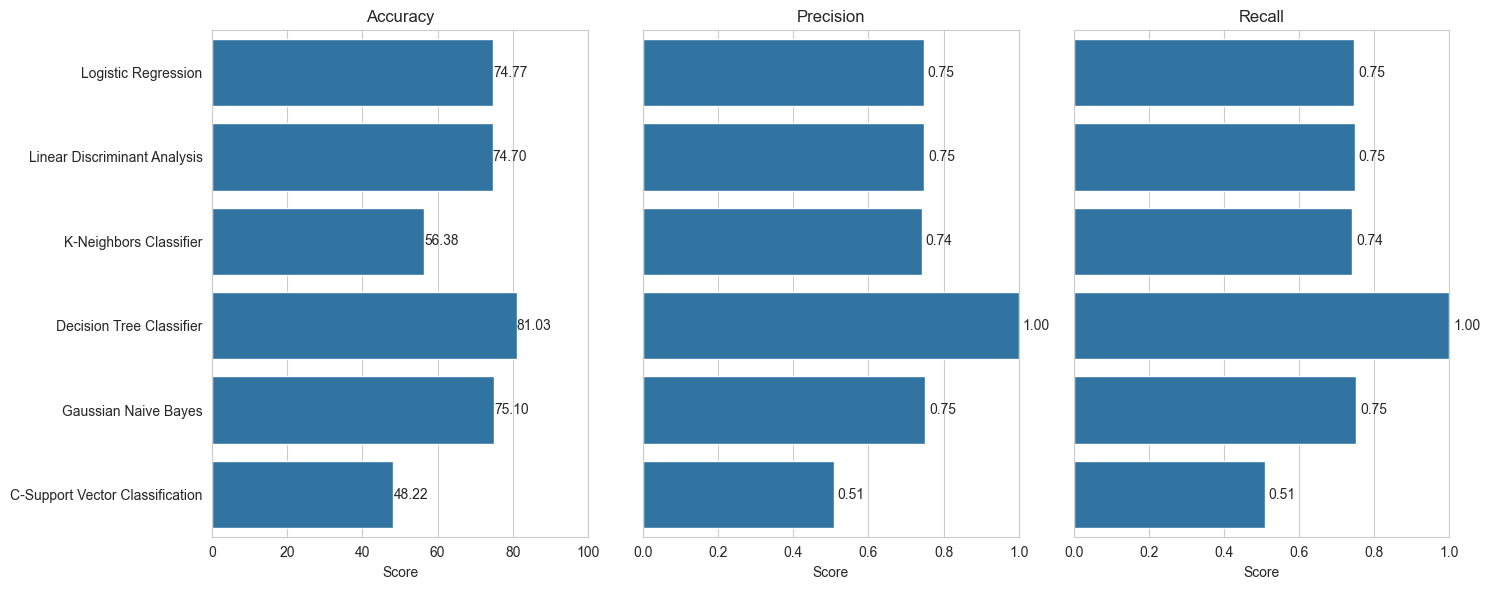

In [97]:
# Combine all metrics into one dataframe
results_df = pd.DataFrame({
    'Method': method_names,
    'Accuracy': method_accuracy,
    'Precision': method_precision,
    'Recall': method_recall
})

# Melt the dataframe to have one row per method and metric
results_melted = results_df.melt(id_vars='Method', var_name='Metric', value_name='Score')

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    ax = sns.barplot(
        data=results_melted[results_melted['Metric'] == metric],
        x='Score',
        y='Method',
        dodge=False,
        ax=axes[i]
    )
    if metric == 'Accuracy':
        ax.set_xlim(0, 100)
    else:
        ax.set_xlim(0, 1)
    ax.set_title(metric)
    ax.set_xlabel('Score')
    ax.set_ylabel('')

    for p in ax.patches:
        ax.text(p.get_width() + 0.01, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()

***
So, it seems I managed to choose the worst method based on intuition.
</br> However, I'll run the best performing <em>DTC method</em> separately:

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(apple_feature_train, apple_target_train_encoded)

apple_target_predicted = dt_classifier.predict(apple_feature_test)

apple_target_predicted_decoded = label_encoder.inverse_transform(apple_target_predicted)

accuracy = accuracy_score(apple_target_test, apple_target_predicted_decoded)
print("Accuracy:", accuracy)

precision = precision_score(apple_target_test, apple_target_predicted_decoded, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(apple_target_test, apple_target_predicted_decoded, average='weighted')
print("Recall:", recall)

Accuracy: 0.81
Precision: 0.8106
Recall: 0.81


I'll also print out the confusion matrix:

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(apple_target_test, apple_target_predicted_decoded)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[322  84]
 [ 68 326]]


Text(0.5, 1.0, 'Method Execution Time')

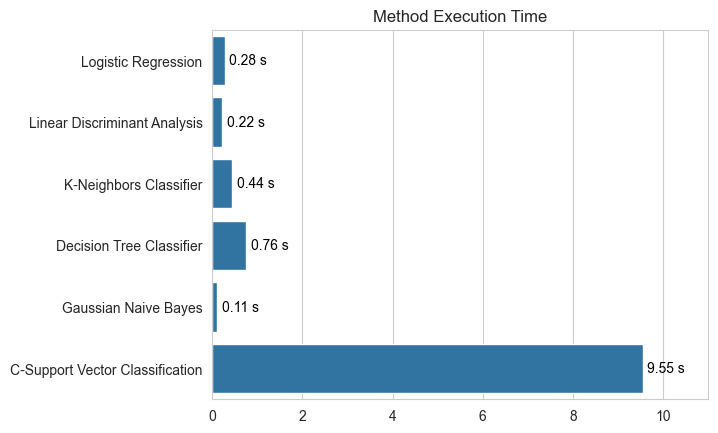

In [100]:
import math

ax2 = sns.barplot(
        y=method_names,
        x=method_execution_time
        )

ax2.set_xlim(0, math.ceil(max(method_execution_time) + 1))

for i, v in enumerate(method_execution_time):
    ax2.text(v + 0.1, i, f'{v:.2f} s', va='center', fontsize=10, color='black')
    
ax2.set_title("Method Execution Time")

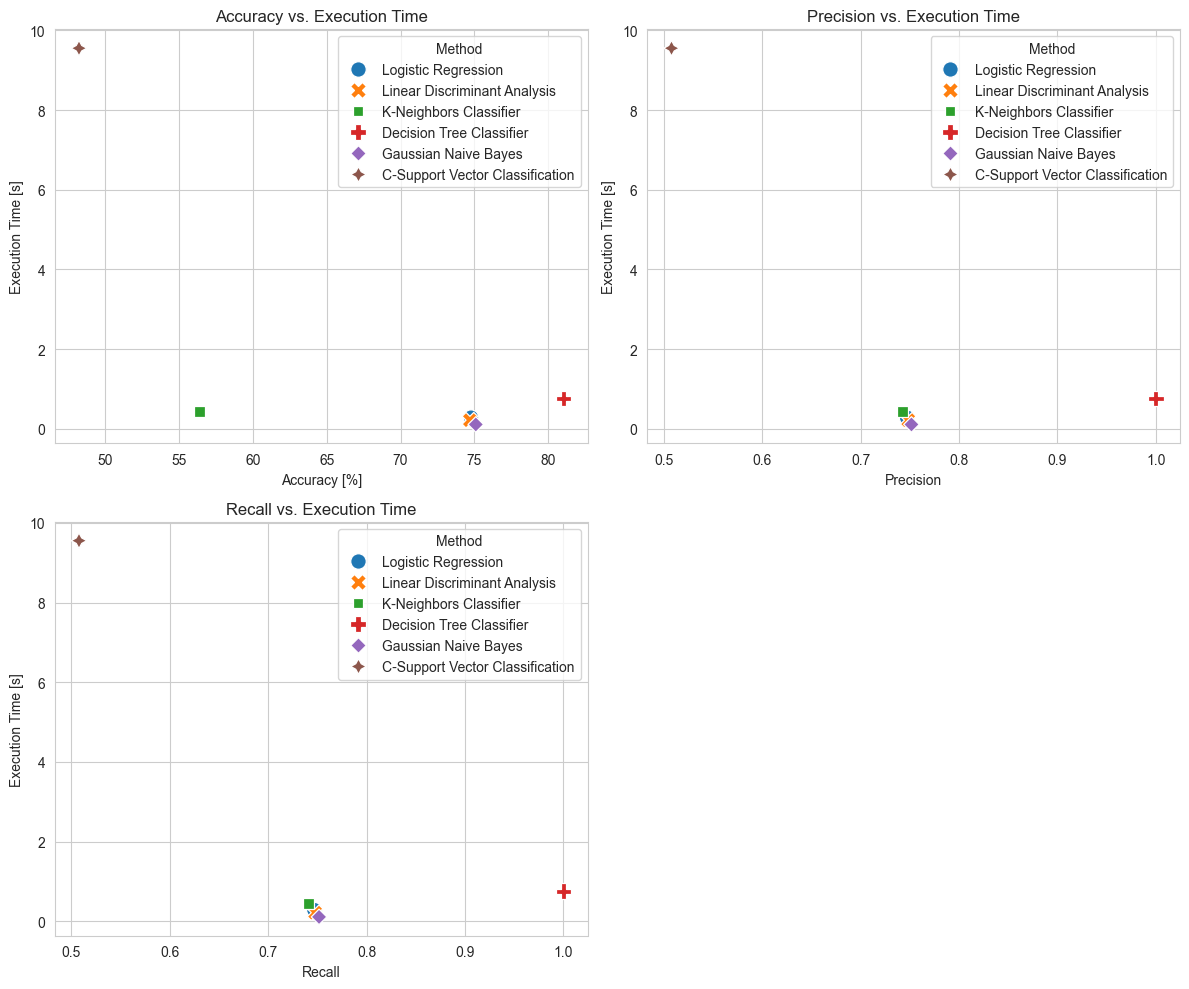

In [101]:
results_df = pd.DataFrame({
    'Method': method_names,
    'Accuracy': method_accuracy,
    'Precision': method_precision,
    'Recall': method_recall,
    'Execution Time': method_execution_time
})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(
    x='Accuracy',
    y='Execution Time',
    hue='Method',
    style='Method',
    s=125,
    data=results_df,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Accuracy vs. Execution Time")
axes[0, 0].set_xlabel("Accuracy [%]")
axes[0, 0].set_ylabel("Execution Time [s]")

sns.scatterplot(
    x='Precision',
    y='Execution Time',
    hue='Method',
    style='Method',
    s=125,
    data=results_df,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Precision vs. Execution Time")
axes[0, 1].set_xlabel("Precision")
axes[0, 1].set_ylabel("Execution Time [s]")

sns.scatterplot(
    x='Recall',
    y='Execution Time',
    hue='Method',
    style='Method',
    s=125,
    data=results_df,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Recall vs. Execution Time")
axes[1, 0].set_xlabel("Recall")
axes[1, 0].set_ylabel("Execution Time [s]")

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()